In [2]:
import torch
import os

PATH = "./data/tts_outputs_test/feature"

In [3]:
# PATH에 저장되어 있는 파일 목록 가져오기

files = os.listdir(PATH)
files = sorted(files)
print(files)

['1000_0.pt', '1000_1.pt', '1000_2.pt', '1000_3.pt', '1000_4.pt', '1000_5.pt', '1001_0.pt', '1001_1.pt', '1001_2.pt', '1001_3.pt', '1001_4.pt', '1001_5.pt', '1002_0.pt', '1002_1.pt', '1002_2.pt', '1003_0.pt', '1003_1.pt', '1003_2.pt', '1003_3.pt', '1003_4.pt', '1003_5.pt', '1004_0.pt', '1004_1.pt', '1004_2.pt', '1004_3.pt', '1004_4.pt', '1004_5.pt', '1005_0.pt', '1005_1.pt', '1005_2.pt', '1005_3.pt', '1005_4.pt', '1005_5.pt', '1006_0.pt', '1006_1.pt', '1006_2.pt', '1006_3.pt', '1006_4.pt', '1007_0.pt', '1007_1.pt', '1007_2.pt', '1007_3.pt', '1007_4.pt', '1007_5.pt', '1008_0.pt', '1008_1.pt', '1008_2.pt', '1008_3.pt', '1008_4.pt', '1008_5.pt', '1009_0.pt', '1009_1.pt', '1009_2.pt', '1009_3.pt', '1009_4.pt', '1009_5.pt', '1010_0.pt', '1010_1.pt', '1010_2.pt', '1010_3.pt', '1010_4.pt', '1010_5.pt', '1011_0.pt', '1011_1.pt', '1011_2.pt', '1011_3.pt', '1011_4.pt', '1011_5.pt', '1012_0.pt', '1012_1.pt', '1012_2.pt', '1012_3.pt', '1012_4.pt', '1012_5.pt', '1013_0.pt', '1013_1.pt', '1013_2.pt'

In [4]:
# 파일 목록에서 _ 앞부분을 기준으로 그룹분류하기
grouped_files = {}
for file in files:
    key = file.split('_')[0]
    if key not in grouped_files:
        grouped_files[key] = []
    grouped_files[key].append(file)

# 그룹별로 파일 목록 출력하기
for key, file_list in grouped_files.items():
    print(f"Group: {key}")
    for file in file_list:
        print(f"  {file}")

Group: 1000
  1000_0.pt
  1000_1.pt
  1000_2.pt
  1000_3.pt
  1000_4.pt
  1000_5.pt
Group: 1001
  1001_0.pt
  1001_1.pt
  1001_2.pt
  1001_3.pt
  1001_4.pt
  1001_5.pt
Group: 1002
  1002_0.pt
  1002_1.pt
  1002_2.pt
Group: 1003
  1003_0.pt
  1003_1.pt
  1003_2.pt
  1003_3.pt
  1003_4.pt
  1003_5.pt
Group: 1004
  1004_0.pt
  1004_1.pt
  1004_2.pt
  1004_3.pt
  1004_4.pt
  1004_5.pt
Group: 1005
  1005_0.pt
  1005_1.pt
  1005_2.pt
  1005_3.pt
  1005_4.pt
  1005_5.pt
Group: 1006
  1006_0.pt
  1006_1.pt
  1006_2.pt
  1006_3.pt
  1006_4.pt
Group: 1007
  1007_0.pt
  1007_1.pt
  1007_2.pt
  1007_3.pt
  1007_4.pt
  1007_5.pt
Group: 1008
  1008_0.pt
  1008_1.pt
  1008_2.pt
  1008_3.pt
  1008_4.pt
  1008_5.pt
Group: 1009
  1009_0.pt
  1009_1.pt
  1009_2.pt
  1009_3.pt
  1009_4.pt
  1009_5.pt
Group: 1010
  1010_0.pt
  1010_1.pt
  1010_2.pt
  1010_3.pt
  1010_4.pt
  1010_5.pt
Group: 1011
  1011_0.pt
  1011_1.pt
  1011_2.pt
  1011_3.pt
  1011_4.pt
  1011_5.pt
Group: 1012
  1012_0.pt
  1012_1.pt
  10

In [5]:
# 같은 그룹 내 텐서들 간 코사인 유사도 계산하기
# 그룹 별 코사인 평균 계산 및 저장하기

grouped_files_pcc = dict.fromkeys(grouped_files.keys(), 0)

from sklearn.metrics.pairwise import cosine_similarity
for key, file_list in grouped_files.items():
    cosine_sim = 0

    standard_tensor = torch.load(os.path.join(PATH, file_list[0]))
    for file in file_list[1:]:
        tensor = torch.load(os.path.join(PATH, file))
        cosine_sim += cosine_similarity(standard_tensor, tensor)[0][0]
    
    if len(file_list) > 1:
        grouped_files_pcc[key] = cosine_sim / (len(file_list) - 1)



grouped_files_pcc

{'1000': np.float32(0.998606),
 '1001': np.float32(0.99509287),
 '1002': np.float32(0.99605554),
 '1003': np.float32(0.9818881),
 '1004': np.float32(0.9945372),
 '1005': np.float32(0.99177873),
 '1006': np.float32(0.99424386),
 '1007': np.float32(0.98464644),
 '1008': np.float32(0.9941721),
 '1009': np.float32(0.9942835),
 '1010': np.float32(0.99616766),
 '1011': np.float32(0.9968513),
 '1012': np.float32(0.99514353),
 '1013': np.float32(0.9970852),
 '1014': np.float32(0.99234664),
 '1015': np.float32(0.9977926),
 '1016': np.float32(0.99463904),
 '1017': np.float32(0.99523336),
 '1018': np.float32(0.9940361),
 '1019': np.float32(0.99590224),
 '1020': np.float32(0.99610204),
 '1021': np.float32(0.99439144),
 '1022': np.float32(0.9920046),
 '1023': np.float32(0.9953515),
 '2048': np.float32(0.9975216),
 '2049': np.float32(0.9961661),
 '2050': np.float32(0.9942974),
 '2051': np.float32(0.97609806),
 '2052': np.float32(0.99651164),
 '2053': np.float32(0.9933707),
 '2054': np.float32(0.9801

In [6]:
sum(grouped_files_pcc.values()) / len(grouped_files_pcc) # 평균 코사인 유사도

np.float32(0.9933933)

In [16]:
grouped_files_pcc = dict.fromkeys(grouped_files.keys(), 0)

gt_array = []
sample_arrays = []

for i, (key, file_list) in enumerate(grouped_files.items()):
    gt_tensor = torch.load(os.path.join(PATH, file_list[0]))
    sample_tensors = []
    for file in file_list[1:]:
        tensor = torch.load(os.path.join(PATH, file))
        sample_tensors.append(tensor)
    sample_tensors = torch.cat(sample_tensors)

    gt_array.append(gt_tensor)
    sample_arrays.append(sample_tensors)

    if i > 20:
        break

gt_array = torch.cat(gt_array)
print(gt_array.shape)

print(len(sample_arrays))
print(sample_arrays[0].shape)



torch.Size([22, 768])
22
torch.Size([5, 768])


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import matplotlib.cm as cm

def visualize_all_in_one(ground_truths, samples):
    assert len(ground_truths) == len(samples)
    N = len(ground_truths)

    # 전체 포인트와 색상 라벨을 모음
    all_vectors = []
    labels = []  # 0 ~ N-1 : 어떤 정답에 속하는 샘플인지

    for i in range(N):
        all_vectors.append(ground_truths[i])  # (784,)
        labels.append(i)  # Ground truth도 label 필요

        for sample in samples[i]:  # Mᵢ개
            all_vectors.append(sample)
            labels.append(i)

    all_vectors = np.stack(all_vectors)  # (N + ΣMᵢ, 784)

    # 차원 축소
    tsne = TSNE(n_components=2, perplexity=5, random_state=42)
    reduced = tsne.fit_transform(all_vectors)

    # 색 팔레트
    colors = cm.get_cmap('tab10', N)

    # 시각화
    plt.figure(figsize=(8, 8))
    plt.rcParams['pdf.fonttype'] = 42  # TrueType fonts
    plt.rcParams['ps.fonttype'] = 42   # For EPS output

    idx = 0
    for i in range(N):
        gt_coord = reduced[idx]
        num_samples = len(samples[i])
        sample_coords = reduced[idx + 1: idx + 1 + num_samples]

        # 정답 벡터 (별표)
        plt.scatter(gt_coord[0], gt_coord[1], color=colors(i), marker='*', s=200, label=f'Target {i}')

        # 샘플 벡터들 (점)
        plt.scatter(sample_coords[:, 0], sample_coords[:, 1], color=colors(i), marker='o', s=70, alpha=0.7)

        # 연결선
        for sc in sample_coords:
            plt.plot([gt_coord[0], sc[0]], [gt_coord[1], sc[1]], color=colors(i), alpha=0.4, linestyle='--')

        idx += 1 + num_samples

    plt.title("t-SNE Visualization of Phonetic Embeddings")
    plt.axis('off')
    plt.legend()
    plt.tight_layout()
    plt.savefig("./Progress/figures/tsne_phonetic_embeddings.pdf", format='pdf')

    plt.show()


/tmp/ipykernel_3175226/1813671261.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', N)


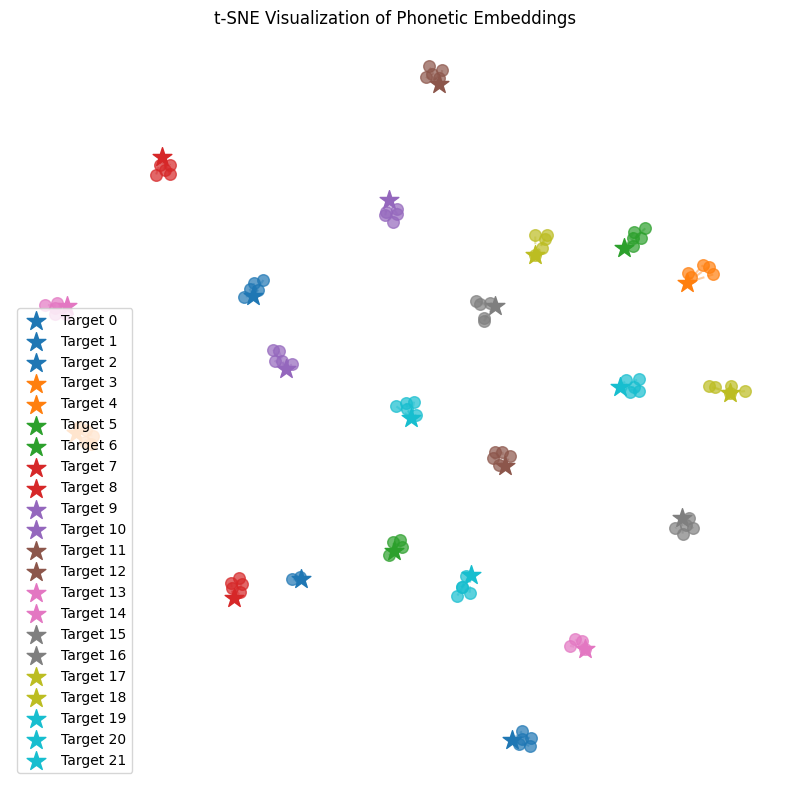

In [24]:
visualize_all_in_one(gt_array.numpy(), sample_arrays)